# Logistic Regression for Identifying Depression Among Students

# Overview
In this task, you will use Logistic Regression to predict whether a student is experiencing depression based on different factors such as academic pressure, sleep habits, and financial stress. You will go through the full machine learning process, from exploring the data to training and evaluating a model. You are also encouraged to create visualizations to better understand the data and support your analysis.

## Dataset
We will use the Student Depression Dataset (good timing after mid term exam I guess).

### Features:
- **Gender**: Male/Female
- **Age**: Student’s age
- **City**: City where the student lives
- **Academic Pressure**: Level of academic stress
- **Work Pressure**: Level of work-related stress
- **CGPA**: Student’s academic performance
- **Study Satisfaction**: How satisfied the student is with their studies
- **Job Satisfaction**: Satisfaction with a job (if applicable)
- **Sleep Duration**: Sleep hours category (e.g., "Less than 5 hours", "5-6 hours")
- **Dietary Habits**: Eating habits (e.g., Healthy, Moderate)
- **Degree**: The degree the student is pursuing
- **Suicidal Thoughts**: Whether the student has had suicidal thoughts (Yes/No)
- **Work/Study Hours**: Hours spent working or studying daily
- **Financial Stress**: Level of financial pressure
- **Family History of Mental Illness**: Whether the student has a family history of mental illness (Yes/No)
- **Depression**: (Target variable: 1 = Has depression, 0 = No depression)

## Tasks
### **Use the df DataFrame from the cell below for all tasks.**
### Task 1 – Explore the Data
    Understand the dataset and find interesting patterns :
        - Use basic pandas functions to check the data.
        - Look for missing values, outliers, and patterns in the features.
        - Create visualizations such as heatmap, histograms, bar charts, scatter plots etc. to explore relationships between different features and depression.

### Task 2 – Data Preprocessing
    Clean and prepare the data for modeling : 
        - Handle missing values (e.g., filling or removing them). 
        - Convert categorical variables into numbers using encoding. 
        - Normalize or standardize numerical features if needed.
        - Explain why you made certain preprocessing choices.

### Task 3 – Train the Model
    Train a Logistic Regression model to predict depression : 
        - Split the data into training and testing sets.
        - Train a Logistic Regression model using scikit-learn. Look at the different parameters in scikit learn libraries ant try to change some of them (only if you can understand them).
        - Make predictions on the test data.

### Task 4 – Evaluate the Model
    Measure how well the model performs : 
        - Calculate accuracy, precision, recall, and F1-score.
        - Create a confusion matrix to see how often the model makes correct and incorrect predictions.
        - Plot an ROC curve to analyze model performance.
        - Think on how we could analyse predicted probabilities

#### Some documentation 

[Seaborn Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
[Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
(There are many different plots and possible analysis to do with Seaborn. Navigate by yourself and feel free to do some insighful analysis)

[Imputing values](https://scikit-learn.org/stable/modules/impute.html)

[scikit-learn preprocessing documentation](https://scikit-learn.org/stable/modules/preprocessing.html)

[Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[Classification metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

In [19]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder

import matplotlib.pyplot as plt

# Load the dataset (assuming it's stored in a CSV file named 'student_depression.csv')
df = pd.read_csv('student_depression.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


Missing values:
 id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

Dataset statistics:
                   id           Age  Academic Pressure  Work Pressure  \
count   27901.000000  27901.000000       27901.000000   27901.000000   
mean    70442.149421     25.82

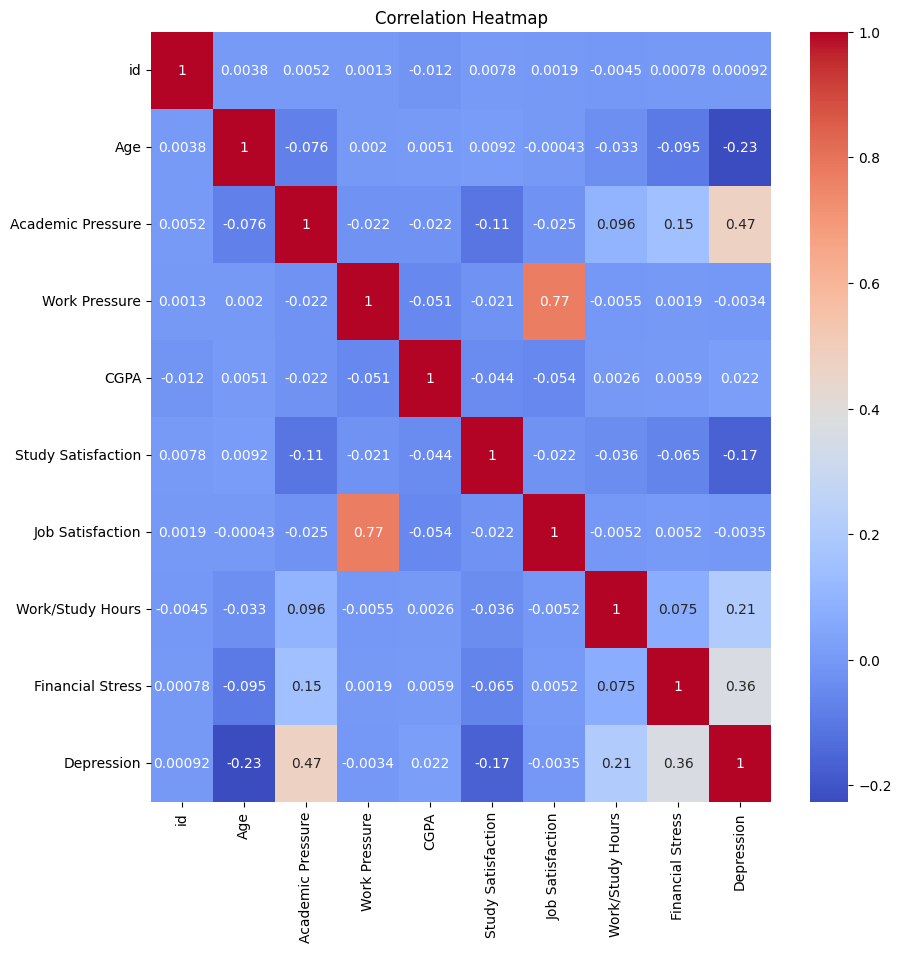

In [20]:

# Task 1: Explore the Data
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Basic statistics
print("\nDataset statistics:\n", df.describe())

# Visualize correlations with a heatmap
plt.figure(figsize=(10, 10))
numerical_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numerical columns
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [21]:
# Handle missing values
# Fill missing values in numerical columns with their median
df['Financial Stress'].fillna(df['Financial Stress'].median(), inplace=True)

# Convert categorical variables into numbers using encoding
# Automatically infer categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

label_encoders = {}  # Dictionary to store label encoders for each column
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the label encoder for future use

# Normalize or standardize numerical features
# Automatically infer numerical columns
scaler = StandardScaler()  # Initialize the StandardScaler
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Explanation of preprocessing choices:
# - Missing values were filled with the median to avoid losing data and to minimize the impact of outliers.
# - Categorical variables were encoded using LabelEncoder to convert them into numerical format for modeling.
# - Numerical features were standardized using StandardScaler to ensure all features are on the same scale, which is important for models like Logistic Regression.

C:\Users\user\AppData\Local\Temp\ipykernel_25580\799225593.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Financial Stress'].fillna(df['Financial Stress'].median(), inplace=True)


In [23]:

# Task 3: Train the Model
# Split the data into training and testing sets
X = df.drop('Depression', axis=1)

# Binarize the target variable
y = (df['Depression'] >= 0).astype(int)  # 1 if Depression >= 0, else 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)



Accuracy: 0.8360508869378248
Precision: 0.8495335540174541
Recall: 0.87183446571958
F1 Score: 0.8605395518975766


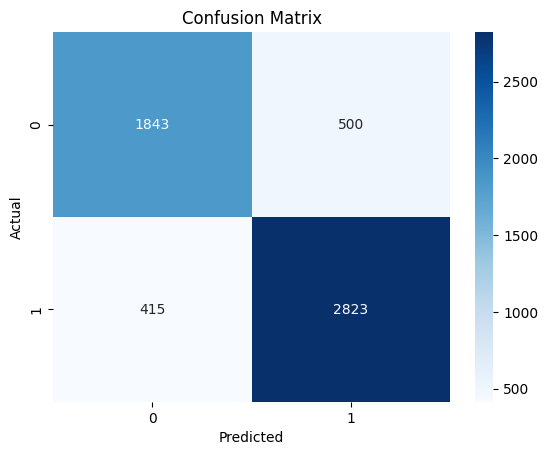

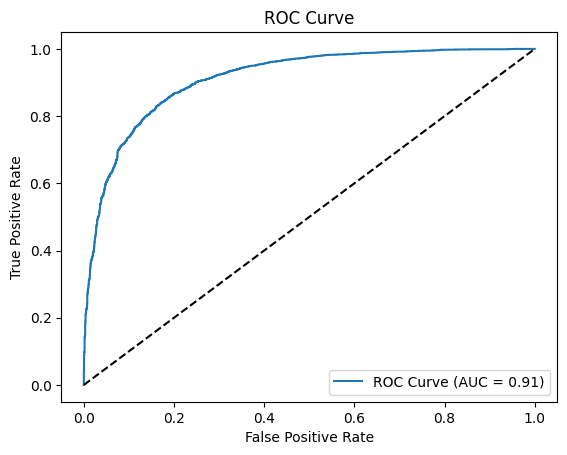

In [24]:
# Task 4: Evaluate the Model
# Ensure y_test is defined
if 'y_test' not in locals():
	_, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')


---
---

## Part two

### Task 1 – Evaluate and Visualize Metric Changes Across Thresholds
    As we have seen in class, different metrics varry according to the threshold. Explain why.

    Compute the TN, TP, FN and FP manually. 
    Find a way to visualise their evolution according to the threshold. 
    Explain the different variations. What does it tell about your predictions ?

    Do the same with evaluation metrics.

    How would you define the optimal threshold ?
    

### Task 2 - Include a financial cost
    In the context of predicting student depression, if the model outputs a positive prediction (the student is predicted as being depressed), you must pay for the student to go to the hospital. 
    This cost is substantial, therefore, it is crucial not only to evaluate the standard classification metrics—such as accuracy, precision, recall, and F1-score—but also to consider the financial implications of your predictions.

    Find a way to define the optimal threshold, including the cost of a positive prediction.


### Task 3 - Cross validation & hyperparameters optimization
    What are the hyperparameters in the logistic regression. 
    Change your code to find the optimal hyperparameters and train it with cross validation
    

### Task 4 - Investigate and understand predictions
    Now that you have an optimized classification (almost), you want to understand why it predicts some students as depressed.
    You might be interested by analysing the difference of feature values for different predicted populations (TP TN FP & FN).
    You could also have a look at the weights of you logistic regression.



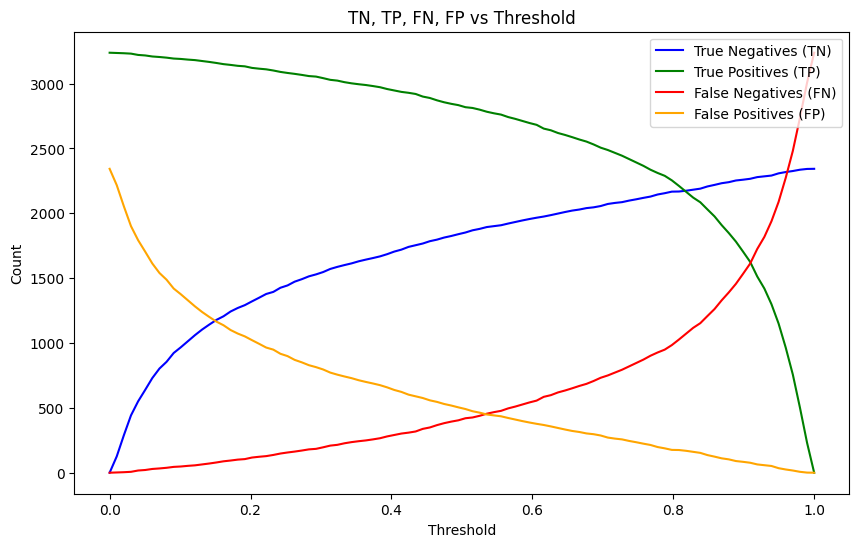

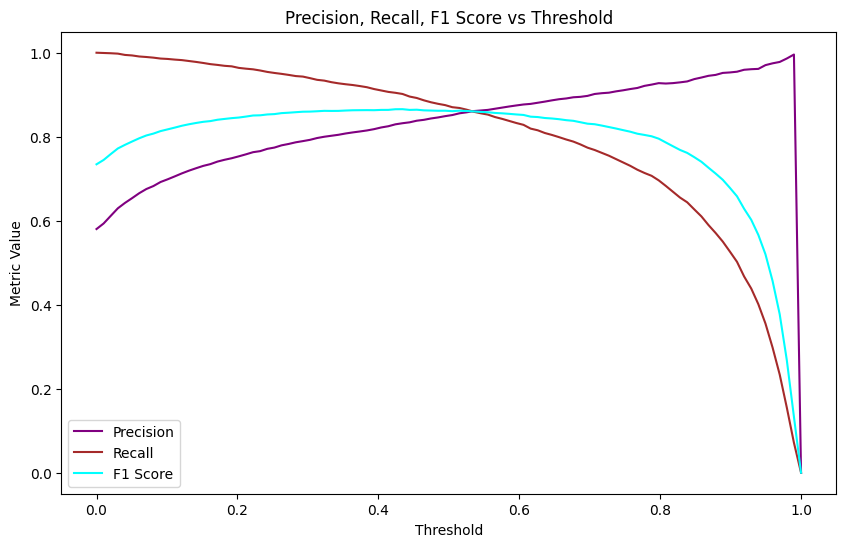

In [26]:
import numpy as np
# Task 1: Evaluate and Visualize Metric Changes Across Thresholds

# Initialize lists to store metrics for each threshold
thresholds = np.linspace(0, 1, 100)  # Generate 100 thresholds between 0 and 1
tn_list, tp_list, fn_list, fp_list = [], [], [], []
precision_list, recall_list, f1_list = [], [], []

# Iterate over thresholds
for threshold in thresholds:
    # Binarize predictions based on the threshold
    y_pred_threshold = (y_pred_prob >= threshold).astype(int)
    
    # Compute TN, TP, FN, FP
    tn = np.sum((y_test == 0) & (y_pred_threshold == 0))
    tp = np.sum((y_test == 1) & (y_pred_threshold == 1))
    fn = np.sum((y_test == 1) & (y_pred_threshold == 0))
    fp = np.sum((y_test == 0) & (y_pred_threshold == 1))
    
    # Append to lists
    tn_list.append(tn)
    tp_list.append(tp)
    fn_list.append(fn)
    fp_list.append(fp)
    
    # Compute precision, recall, and F1-score
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

# Plot TN, TP, FN, FP
plt.figure(figsize=(10, 6))
plt.plot(thresholds, tn_list, label='True Negatives (TN)', color='blue')
plt.plot(thresholds, tp_list, label='True Positives (TP)', color='green')
plt.plot(thresholds, fn_list, label='False Negatives (FN)', color='red')
plt.plot(thresholds, fp_list, label='False Positives (FP)', color='orange')
plt.xlabel('Threshold')
plt.ylabel('Count')
plt.title('TN, TP, FN, FP vs Threshold')
plt.legend()
plt.show()

# Plot precision, recall, and F1-score
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_list, label='Precision', color='purple')
plt.plot(thresholds, recall_list, label='Recall', color='brown')
plt.plot(thresholds, f1_list, label='F1 Score', color='cyan')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Precision, Recall, F1 Score vs Threshold')
plt.legend()
plt.show()

# Explanation:
# - As the threshold increases, the model becomes more conservative in predicting positives, leading to fewer FP and TP.
# - Precision increases with higher thresholds as FP decreases, but recall decreases as FN increases.
# - The optimal threshold can be defined as the one that maximizes the F1-score or balances precision and recall, depending on the use case.

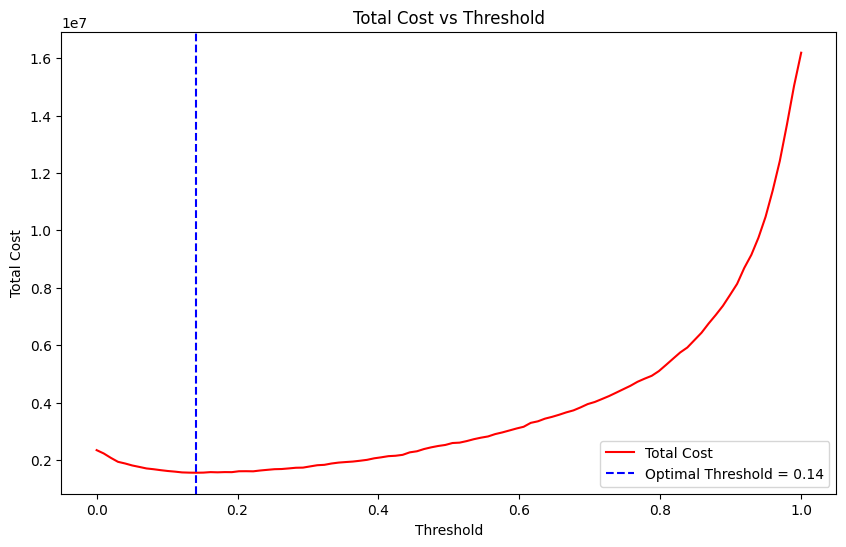

Optimal Threshold: 0.14
Minimum Total Cost: $1556000


In [27]:
# Define costs
false_positive_cost = 1000  # Cost of sending a non-depressed student to the hospital
false_negative_cost = 5000  # Cost of not sending a depressed student to the hospital

# Initialize lists to store costs
total_costs = []

# Iterate over thresholds
for threshold in thresholds:
    # Binarize predictions based on the threshold
    y_pred_threshold = (y_pred_prob >= threshold).astype(int)
    
    # Compute FP and FN
    fp = np.sum((y_test == 0) & (y_pred_threshold == 1))
    fn = np.sum((y_test == 1) & (y_pred_threshold == 0))
    
    # Calculate total cost
    total_cost = (fp * false_positive_cost) + (fn * false_negative_cost)
    total_costs.append(total_cost)

# Find the optimal threshold
optimal_threshold_index = np.argmin(total_costs)
optimal_threshold = thresholds[optimal_threshold_index]
optimal_cost = total_costs[optimal_threshold_index]

# Plot total cost vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, total_costs, label='Total Cost', color='red')
plt.axvline(optimal_threshold, color='blue', linestyle='--', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Total Cost')
plt.title('Total Cost vs Threshold')
plt.legend()
plt.show()

print(f"Optimal Threshold: {optimal_threshold:.2f}")
print(f"Minimum Total Cost: ${optimal_cost}")

In [28]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],  # Regularization type
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers that support l1 and l2 penalties
    'max_iter': [100, 200, 500]  # Maximum number of iterations
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

# Train the model with the best parameters
optimized_model = LogisticRegression(**best_params)
optimized_model.fit(X_train, y_train)

# Evaluate the optimized model on the test set
optimized_y_pred = optimized_model.predict(X_test)
optimized_accuracy = accuracy_score(y_test, optimized_y_pred)
print("Test Accuracy with Optimized Model:", optimized_accuracy)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
225 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\AppData\

Best Hyperparameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-Validation Accuracy: 0.8483870967741935
Test Accuracy with Optimized Model: 0.8362300662963627


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Feature Value Comparison Across Predicted Populations:
                                       True Positives (TP)  \
id                                                0.034715   
Gender                                            0.557720   
Age                                              -0.239087   
City                                             26.017351   
Profession                                       10.988314   
Academic Pressure                                 0.503747   
Work Pressure                                    -0.009777   
CGPA                                              0.040998   
Study Satisfaction                               -0.159840   
Job Satisfaction                                 -0.015340   
Sleep Duration                                    1.503187   
Dietary Habits                                    1.750354   
Degree                                           10.915722   
Have you ever had suicidal thoughts ?             0.909703   
Work/Study Hour

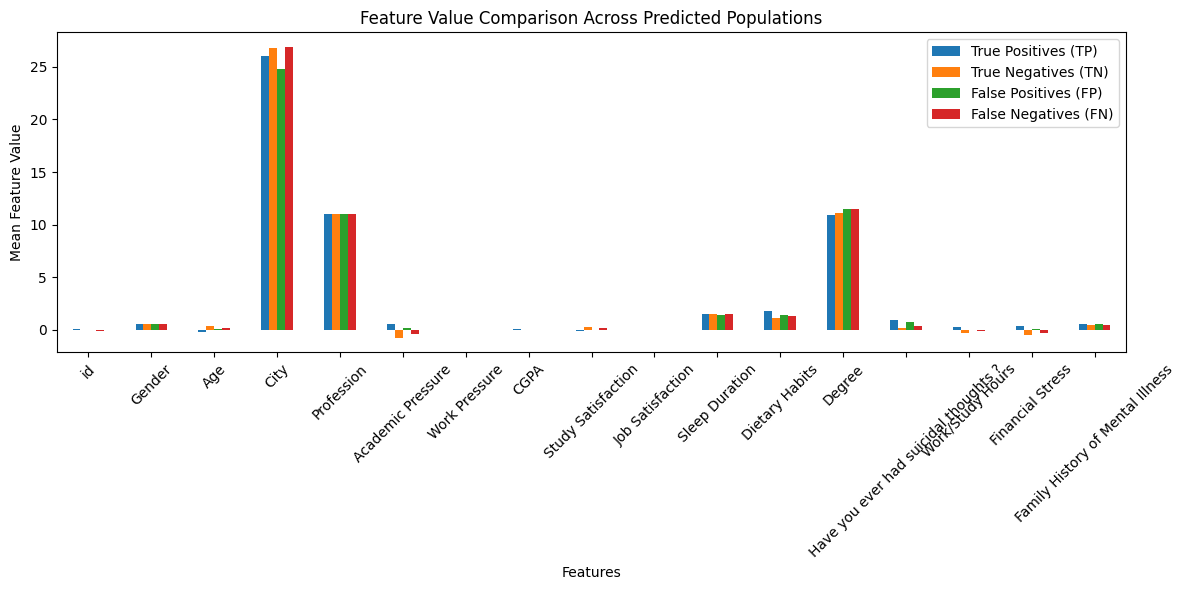

Feature Weights (Logistic Regression):
Have you ever had suicidal thoughts ?    2.514297
Academic Pressure                        1.156020
Financial Stress                         0.788493
Work/Study Hours                         0.427774
Dietary Habits                           0.341137
Family History of Mental Illness         0.263493
CGPA                                     0.089509
Job Satisfaction                         0.006302
Work Pressure                            0.002517
Degree                                   0.001208
id                                       0.000000
Gender                                   0.000000
City                                    -0.002221
Sleep Duration                          -0.037848
Profession                              -0.137667
Study Satisfaction                      -0.330257
Age                                     -0.518643
dtype: float64


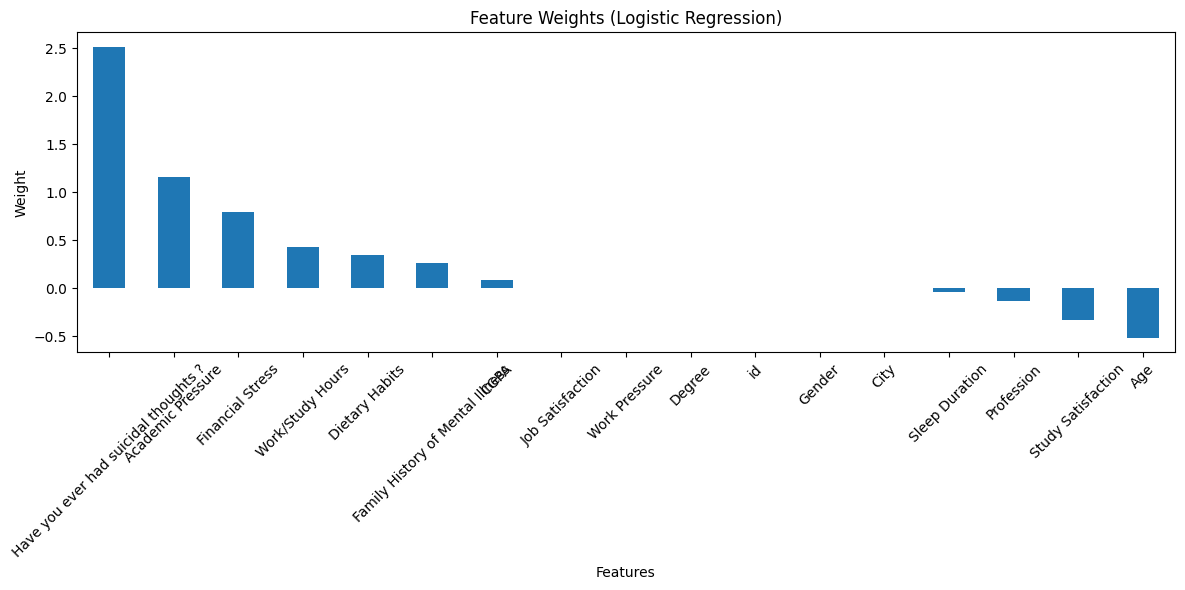

In [29]:
# Task 4: Investigate and Understand Predictions

# Separate the predicted populations
tp_indices = (y_test == 1) & (optimized_y_pred == 1)  # True Positives
tn_indices = (y_test == 0) & (optimized_y_pred == 0)  # True Negatives
fp_indices = (y_test == 0) & (optimized_y_pred == 1)  # False Positives
fn_indices = (y_test == 1) & (optimized_y_pred == 0)  # False Negatives

# Analyze feature values for each population
tp_features = X_test[tp_indices]
tn_features = X_test[tn_indices]
fp_features = X_test[fp_indices]
fn_features = X_test[fn_indices]

# Calculate mean feature values for each population
tp_mean = tp_features.mean()
tn_mean = tn_features.mean()
fp_mean = fp_features.mean()
fn_mean = fn_features.mean()

# Combine the means into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'True Positives (TP)': tp_mean,
    'True Negatives (TN)': tn_mean,
    'False Positives (FP)': fp_mean,
    'False Negatives (FN)': fn_mean
})

print("Feature Value Comparison Across Predicted Populations:")
print(comparison_df)

# Visualize the comparison
comparison_df.plot(kind='bar', figsize=(12, 6))
plt.title('Feature Value Comparison Across Predicted Populations')
plt.ylabel('Mean Feature Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# Analyze the weights of the logistic regression model
feature_weights = pd.Series(optimized_model.coef_[0], index=X.columns)
feature_weights = feature_weights.sort_values(ascending=False)

print("Feature Weights (Logistic Regression):")
print(feature_weights)

# Visualize the feature weights
feature_weights.plot(kind='bar', figsize=(12, 6))
plt.title('Feature Weights (Logistic Regression)')
plt.ylabel('Weight')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
